In [80]:
import numpy as np
import pandas as pd 
import yfinance as yf 
import matplotlib.pyplot as plt
import scipy.optimize as optimization
NUM_TRADING_DAYS=252
df= pd.read_csv('ind_nifty500list.csv')
c=df['Symbol'].to_list()[0:4]
stocks=c

start_date='2021-01-01'
end_date='2023-05-01'

def download_data():
    stock_data={}
    for stock in stocks:
        ticker=yf.Ticker(stock)
        stock_data[stock]=ticker.history(start=start_date,end=end_date)['Close']
        
    return pd.DataFrame(stock_data)    


def show_data(data):
    data.plot(figsize=(30,15))
    plt.show()
    
    
def calculate_return(data):
    log_return=np.log(data/data.shift(1))
    return log_return[1:]
    
if __name__=='__main__':
    dataset=download_data()
    calculate_return(dataset)

def show_statistics(returns):
    print(returns.mean()*NUM_TRADING_DAYS)
    print(returns.cov()*NUM_TRADING_DAYS)
    
if __name__=='__main__':
    dataset=download_data()
    
    log_daily_returns=calculate_return(dataset)
    #show_statistics(log_daily_returns)
    
def show_mean_variance(returns,weights):
    portfolio_return=np.sum(returns.mean()*weights)*NUM_TRADING_DAYS
    portfolio_variance=np.dot(weights.T,np.dot(returns.cov()*NUM_TRADING_DAYS,WEIGHTS))
    portfolio_volatality=np.sqrt(np.dot(weights.T,np.dot(returns.cov()*NUM_TRADING_DAYS,weights)))
    print("Expected mean of portfolio is:",portfolio_return)
    print("Expected Volatality of portfolio is:",portfolio_volatality)
    

    

In [81]:
NUM_PORTFOLIOS=50000


In [82]:
download_data()


,AMARAJABAT.NS,APOLLOTYRE.NS,ASAHIINDIA.NS,BAJAJ-AUTO.NS
Date,,,,
2021-01-01 00:00:00+05:30,901.226379,174.185364,274.690186,3243.078613
2021-01-04 00:00:00+05:30,940.878174,182.609024,281.263397,3281.459961
2021-01-05 00:00:00+05:30,959.729980,181.059830,286.650452,3253.698730
2021-01-06 00:00:00+05:30,953.446106,180.478897,281.708221,3225.797852
2021-01-07 00:00:00+05:30,961.970703,184.690720,282.746063,3202.741211
...,...,...,...,...
2023-04-24 00:00:00+05:30,594.349976,332.100006,454.450012,4332.100098
2023-04-25 00:00:00+05:30,606.700012,330.000000,448.750000,4342.549805
2023-04-26 00:00:00+05:30,602.000000,334.850006,475.750000,4299.000000


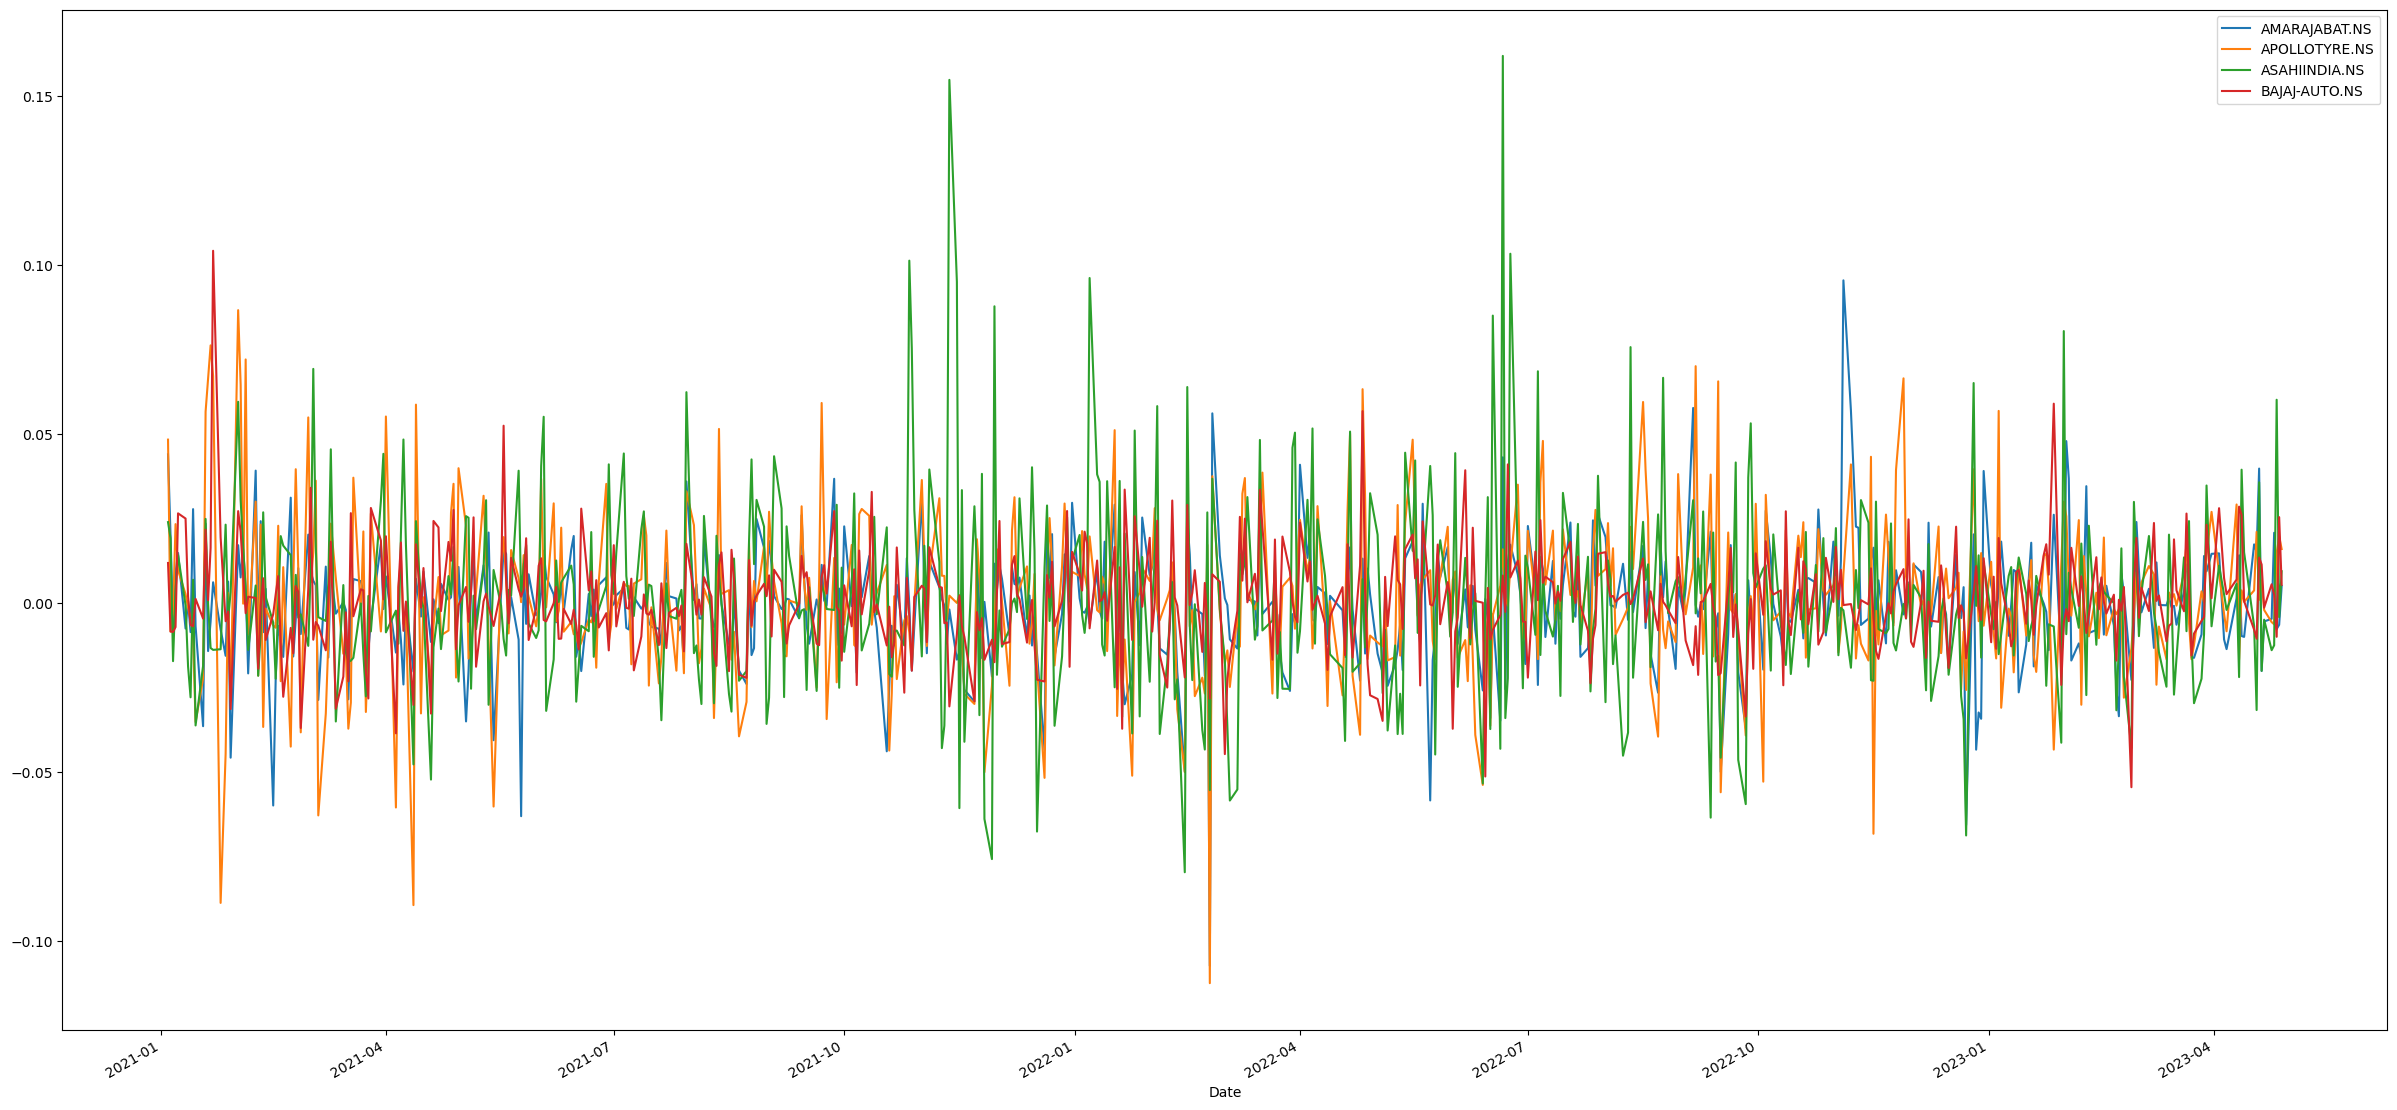

In [83]:
show_data(dataset.pct_change())

# Creating portfolios

In [84]:
def show_portfolios(returns,volatalities):
    plt.figure(figsize=(20,12))
    plt.scatter(volatalities,returns,c=returns/volatalities,marker='.')
    #plt.grid(True)
    plt.xlabel('Expected Volatality')
    plt.ylabel('Expected Return')
    plt.colorbar(label='Sharpe Ratio')
    plt.show()
    





def generate_portfolios(returns):
    portfolio_means=[]
    portfolio_risks=[]
    portfolio_weights=[]
    
    
    for _ in range(NUM_PORTFOLIOS):
        w=np.random.random(len(stocks))
        w/=np.sum(w)
        portfolio_weights.append(w)
        portfolio_means.append(np.sum(returns.mean()*w)*NUM_TRADING_DAYS)
        portfolio_risks.append(np.sqrt(np.dot(w.T,np.dot(returns.cov()*NUM_TRADING_DAYS,w))))
    return np.array(portfolio_weights),np.array(portfolio_means),np.array(portfolio_risks)

In [85]:
weights,means,risks=generate_portfolios(log_daily_returns)

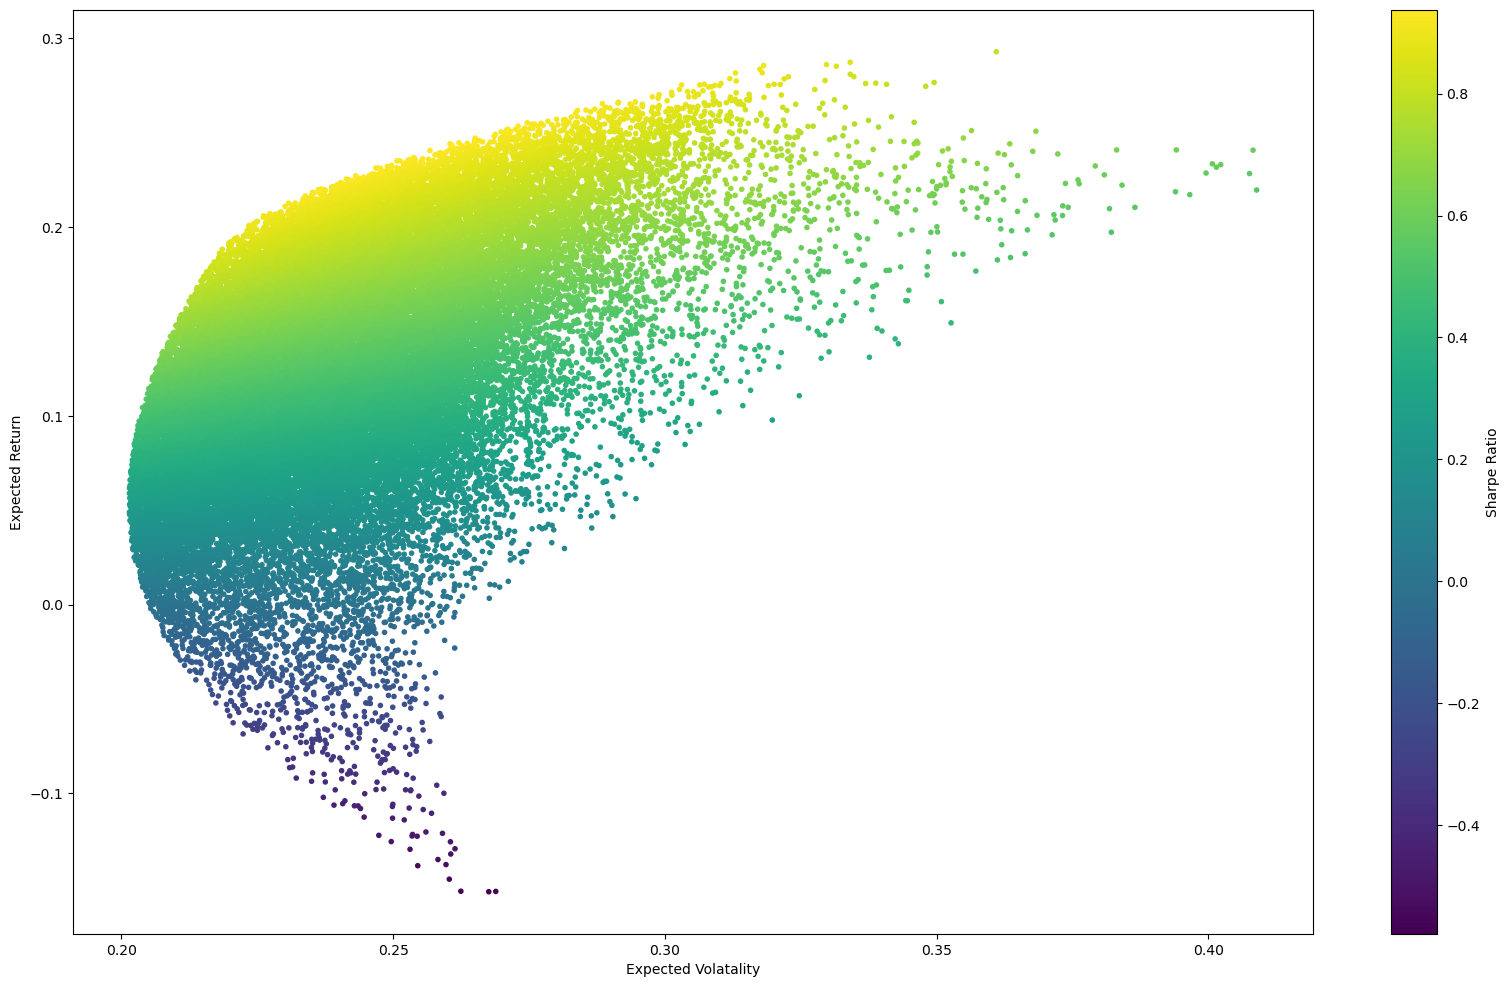

In [86]:
show_portfolios(means,risks)

In [87]:
len(weights)

50000

# Scipy Optimization

In [88]:
def statistics(weights,returns):
    portfolio_return=np.sum(returns.mean()*weights)*NUM_TRADING_DAYS
    portfolio_volatility=np.sqrt(np.dot(weights.T,np.dot(returns.cov()*NUM_TRADING_DAYS,weights)))
    return np.array([portfolio_return,portfolio_volatility,portfolio_return/portfolio_volatility])

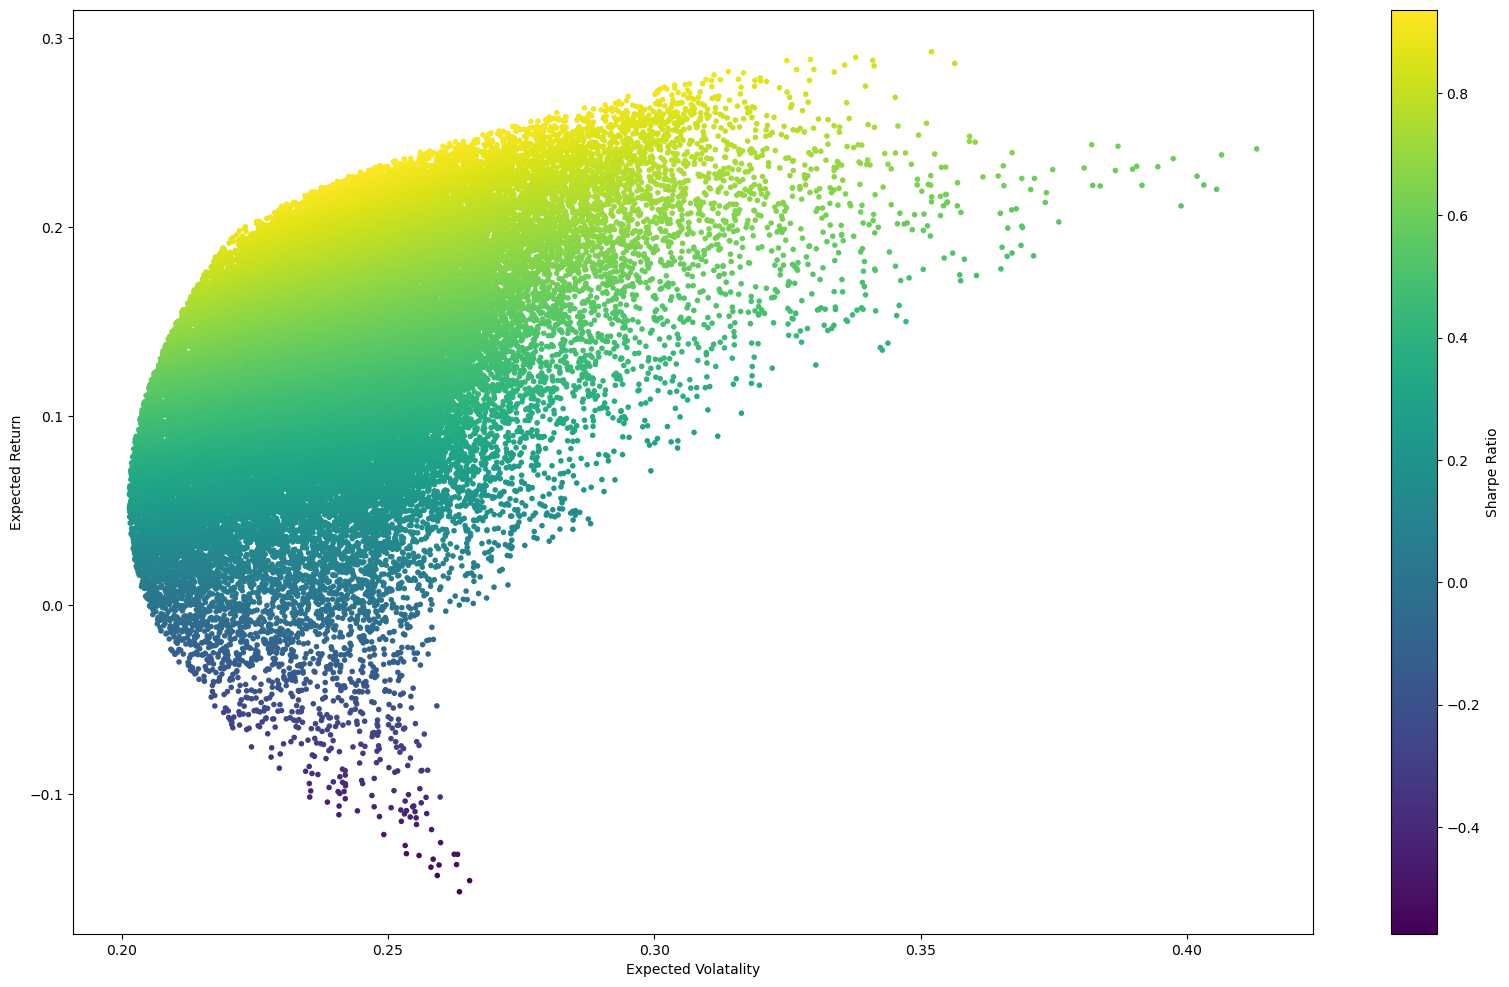

In [89]:
pweights,means,risks=generate_portfolios(log_daily_returns)
show_portfolios(means,risks)

In [90]:
def min_function_sharpe(weights,returns):
    return -statistics(weights,returns)[2]


def optimize_portfolio(weights,returns):
    constraints={'type':'eq','fun': lambda x: np.sum(x)-1}
    bounds=tuple((0,1) for _ in range(len(stocks)))
    return optimization.minimize(fun=min_function_sharpe,x0=weights[0],args=returns,method='SLSQP',bounds=bounds,constraints=constraints)

In [91]:
def print_optimal_portfolio(optimum,returns):
    print("OPtimum portfolio",optimum['x'].round(3))
    print("Expected return,volatality and sharpe ratio:",statistics(optimum['x'].round(3),returns))

In [92]:
def show_optimal_portfolio(opt,rets,portfolio_rets,portfolio_vols):
    plt.figure(figsize=(16,9),facecolor='black')
    plt.scatter(portfolio_vols,portfolio_rets,c=portfolio_rets/portfolio_vols,marker='.')
    plt.grid(True)    
    plt.xlabel('Expected Volatality')
    plt.ylabel('Expected Returns')
    plt.colorbar(label='Sharpe Ratio')
    plt.plot(statistics(opt['x'],rets)[1],statistics(optimum['x'],rets)[0],'r*',markersize=20)
    plt.show()

In [93]:
optimum=optimize_portfolio(pweights,log_daily_returns)
print_optimal_portfolio(optimum,log_daily_returns)

OPtimum portfolio [0.    0.454 0.227 0.319]
Expected return,volatality and sharpe ratio: [0.23630159 0.25165074 0.93900616]


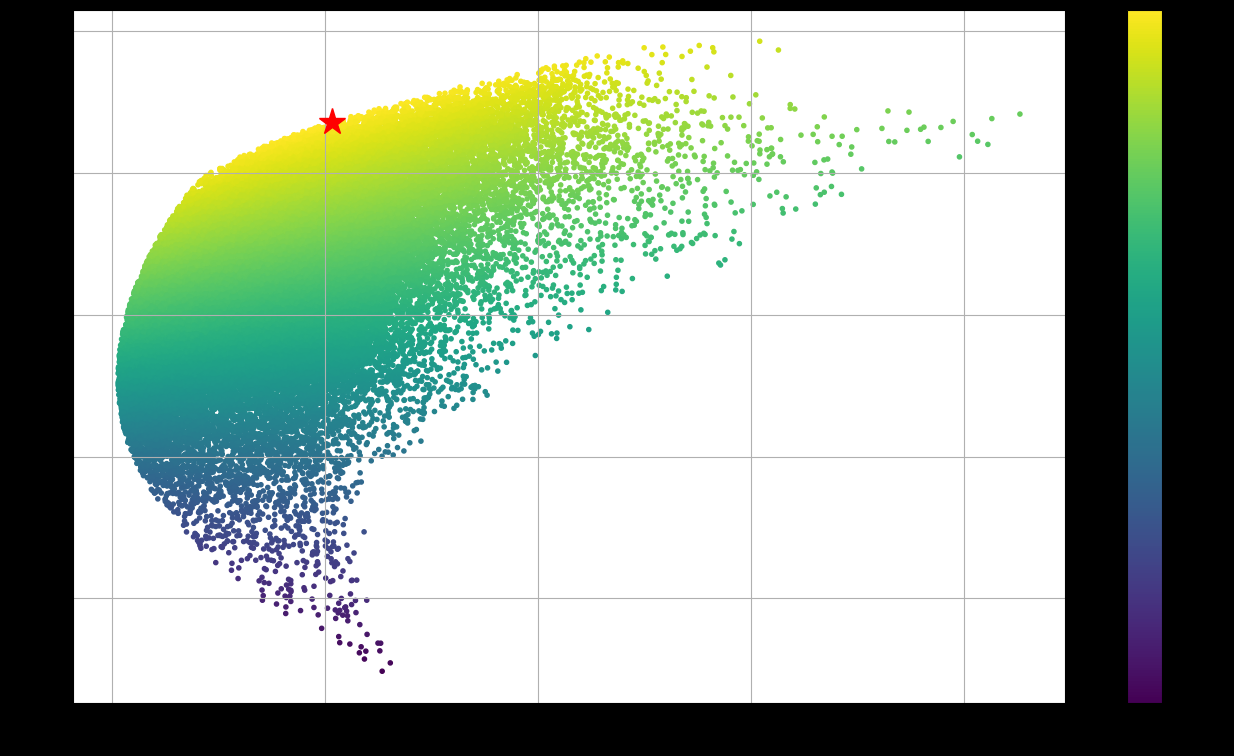

In [94]:
show_optimal_portfolio(optimum,log_daily_returns,means,risks)